## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
model = build_mlp(input_shape = x_train.shape[1:], num_neurons=[512, 256, 256, 256, 256])
model.summary()

W0715 23:18:06.887043  5048 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 23:18:06.890043  5048 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 23:18:06.893043  5048 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total para

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 1000

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0715 23:18:07.186563  5048 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 23:18:07.204561  5048 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0715 23:18:07.470558  5048 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 23:18:07.604562  5048 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 189us/step - loss: 2.0482 - acc: 0.2472 - val_loss: 1.8749 - val_acc: 0.3248
Epoch 2/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.8015 - acc: 0.3492 - val_loss: 1.7217 - val_acc: 0.3902
Epoch 3/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.6992 - acc: 0.3867 - val_loss: 1.6646 - val_acc: 0.3939
Epoch 4/100
50000/50000 [==============================] - 8s 164us/step - loss: 1.6427 - acc: 0.4112 - val_loss: 1.6339 - val_acc: 0.4133
Epoch 5/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.5752 - acc: 0.4350 - val_loss: 1.5560 - val_acc: 0.4431
Epoch 6/100
50000/50000 [==============================] - 10s 199us/step - loss: 1.5250 - acc: 0.4554 - val_loss: 1.5263 - val_acc: 0.4580
Epoch 7/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.4843 - acc: 0.4693 - val_loss: 1

50000/50000 [==============================] - 5s 105us/step - loss: 0.3552 - acc: 0.8754 - val_loss: 2.2842 - val_acc: 0.5104
Epoch 59/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.3520 - acc: 0.8780 - val_loss: 2.3466 - val_acc: 0.5042
Epoch 60/100
50000/50000 [==============================] - 6s 128us/step - loss: 0.3538 - acc: 0.8751 - val_loss: 2.3834 - val_acc: 0.5146
Epoch 61/100
50000/50000 [==============================] - 6s 113us/step - loss: 0.3977 - acc: 0.8577 - val_loss: 2.4308 - val_acc: 0.5019
Epoch 62/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.3311 - acc: 0.8824 - val_loss: 2.5037 - val_acc: 0.5078
Epoch 63/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.3584 - acc: 0.8723 - val_loss: 2.4649 - val_acc: 0.5107
Epoch 64/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.3366 - acc: 0.8794 - val_loss: 2.4999 - val_acc: 0.5124
Epoch 65/100
50000/50000 [=======

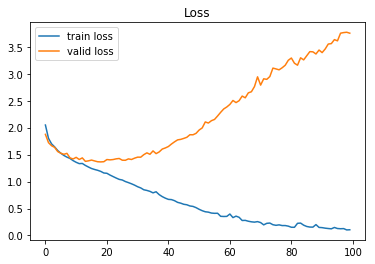

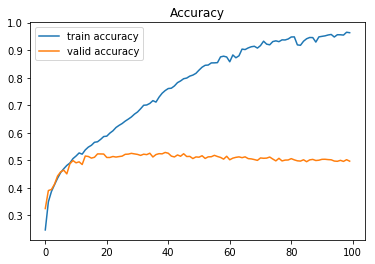

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()